In [1]:
import numpy as np
from scipy import integrate, special, interpolate
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.table import Table
import pickle
import time


In [2]:
# Load the interpolated data

# for function F

t1 =  time.time()

F_file = open("F_values.pkl", "rb")
F_dict = pickle.load(F_file)
F_x_values = F_dict['x']
F_values = F_dict['F']

interp_func_F = interpolate.interp1d(F_x_values, F_values, kind="cubic", fill_value=F_values[-1], bounds_error=False)

t2 = time.ti

# for function F2

F2_file = open("F2_values.pkl", "rb")
F2_dict = pickle.load(F2_file)
F2_x_values = F2_dict['x']
F2_p_values = F2_dict['p']
F2_values = F2_dict['F2']

F2_grid = np.array(F2_values).reshape(len(F2_p_values), len(F2_x_values))

interp_func_F2 = interpolate.RegularGridInterpolator((np.unique(F2_x_values), np.unique(F2_p_values)), F2_grid.T)

# for function F3

F3_file = open("F3_values.pkl", "rb")
F3_dict = pickle.load(F3_file)
F3_x_values = F3_dict['x']
F3_p_values = F3_dict['p']
F3_values = F3_dict['F3']

F3_grid = np.array(F3_values).reshape(len(F3_p_values), len(F3_x_values))

interp_func_F3 = interpolate.RegularGridInterpolator((np.unique(F3_x_values), np.unique(F3_p_values)), F3_grid.T)


def calc_F(x, to_interp=False):
    """
    Returns values of function F (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """
    if not to_interp:
        def fy1(y):
            return special.kv(5.0 / 3.0, y)

        if isinstance(x, float):
            return x * integrate.quad(fy1, x, np.inf)[0]
        else:
            F_x = np.zeros(len(x))
            for i, x_i in enumerate(x):
                F_x[i] = x_i * integrate.quad(fy1, x_i, np.inf)[0]
            return F_x
    else:
        return interp_func_F(x)
    
    

def calc_F_2(x, calc_F, p, to_interp=False):
    """
    Returns values of function F2 (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """
    if not to_interp:
        def fy2(y):
            return calc_F(y) * (y ** ((p - 2.0) / 2.0))

        if isinstance(x, float):
            return np.sqrt(3) * integrate.quad(fy2, 0, x)[0]
        else:
            F_2_x = np.zeros(len(x))
            for i, x_i in enumerate(x):
                if x_i < 20000:
                    F_2_x[i] = np.sqrt(3) * integrate.quad(fy2, 0, x_i)[0]
                else:
                    F_2_x[i:] = np.sqrt(3) * integrate.quad(fy2, 0, 20000)[0]
            return F_2_x
    else:
        return interp_func_F2((x,p))

def calc_F_3(x, calc_F, p, to_interp=False):
    """
    Returns values of function F3 (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """
    if not to_interp:
        def fy3(y):
            return calc_F(y) * (y ** ((p - 3.0) / 2.0))

        if isinstance(x, float):
            return np.sqrt(3) * integrate.quad(fy3, 0, x)[0]
        else:
            F_3_x = np.zeros(len(x))
            for i, x_i in enumerate(x):
                if x_i < 2000:
                    F_3_x[i] = np.sqrt(3) * integrate.quad(fy3, 0, x_i)[0]
                else:
                    F_3_x[i:] = np.sqrt(3) * integrate.quad(fy3, 0, 2000)[0]
            return F_3_x

    else:
        return interp_func_F3((x,p))



/tmp/ipykernel_25911/3848724790.py:47: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return x * integrate.quad(fy1, x, np.inf)[0]


Time taken to run the full calculation =  4.010484457015991
Time taken to run the interpolated calculation =  0.0003991127014160156
actual_time/interp_time =  10048.50119474313
[-5.74796353e-06 -2.42310050e-04 -2.62785554e-04 -3.11744589e-04
 -3.53323380e-04 -3.79064655e-04 -3.92824685e-04 -3.99588031e-04
 -4.02737583e-04 -4.04150230e-04 -4.04766626e-04 -4.05029989e-04
 -4.05140666e-04 -4.05186554e-04 -4.05205382e-04 -4.05213031e-04
 -4.05216115e-04 -4.05217350e-04 -4.05217842e-04 -4.05218037e-04
 -4.05218112e-04 -4.05218141e-04 -4.05218155e-04 -4.05218160e-04
 -4.05218162e-04 -4.05218160e-04 -4.05218160e-04 -4.05218163e-04
 -4.05218163e-04 -4.05218163e-04 -4.05218163e-04 -4.05218163e-04
 -4.05218163e-04 -4.05218163e-04 -4.05218163e-04 -4.05218163e-04
 -4.05218163e-04 -4.05218163e-04 -4.05218163e-04 -4.05218165e-04
 -4.05218163e-04 -4.05218163e-04 -4.05218163e-04 -4.05218163e-04
 -4.05218163e-04 -4.05218163e-04 -4.05218163e-04 -4.05218163e-04
 -4.05218163e-04 -4.05218163e-04 -4.0521816

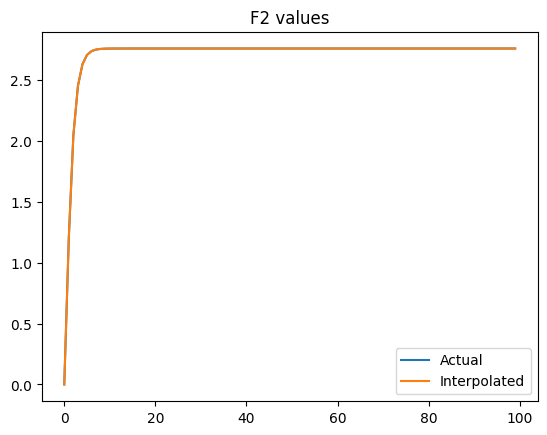

In [3]:
x = np.arange(100)+1.0e-4
p = 2.314

plt.figure()
plt.title("F2 values")

actual_start = time.time()

F2_actual = calc_F_2(x, calc_F, p)

actual_stop = time.time()


F2_interp = calc_F_2(x, calc_F, p, to_interp=True)

interp_stop = time.time()

print("Time taken to run the full calculation = ", actual_stop - actual_start)
print("Time taken to run the interpolated calculation = ", interp_stop -  actual_stop)


print("actual_time/interp_time = ", (actual_stop - actual_start)/(interp_stop -  actual_stop))

print(F2_actual -  F2_interp)

plt.plot(x, F2_actual, label="Actual")
plt.plot(x, F2_interp, label="Interpolated")
plt.legend()

/tmp/ipykernel_25911/3848724790.py:47: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return x * integrate.quad(fy1, x, np.inf)[0]


Time taken to run the full calculation =  4.849468469619751
Time taken to run the interpolated calculation =  0.0004153251647949219
actual_time/interp_time =  11676.31745120551
[        nan -0.00091724 -0.0009331  -0.00096417 -0.00098655 -0.00099877
 -0.00100467 -0.00100734 -0.00100849 -0.00100898 -0.00100918 -0.00100926
 -0.0010093  -0.00100931 -0.00100931 -0.00100932 -0.00100932 -0.00100932
 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932
 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932
 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932
 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932
 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932
 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932
 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932
 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932 -0.00100932
 -0.00100932 -0.0010

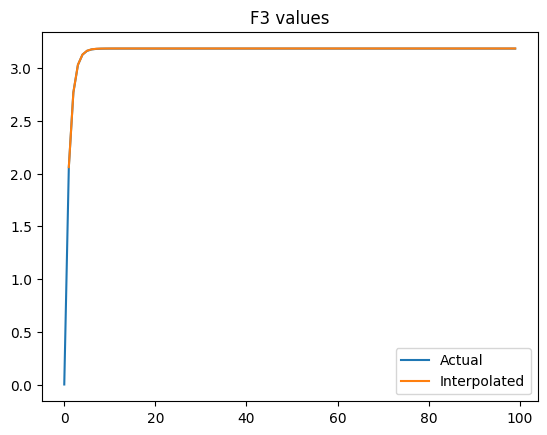

In [4]:
x = np.arange(100)+1.0e-4
p = 2.314

plt.figure()
plt.title("F3 values")

actual_start = time.time()

F3_actual = calc_F_3(x, calc_F, p)

actual_stop = time.time()

F3_interp = calc_F_3(x, calc_F, p, to_interp=True)


interp_stop = time.time()

print("Time taken to run the full calculation = ", actual_stop - actual_start)
print("Time taken to run the interpolated calculation = ", interp_stop -  actual_stop)


print("actual_time/interp_time = ", (actual_stop - actual_start)/(interp_stop -  actual_stop))

print(F3_actual -  F3_interp)



plt.plot(x, F3_actual, label="Actual")
plt.plot(x, F3_interp, label="Interpolated")
plt.legend()